   Copyright ""Bhandari, S., Overskott, S., Adamopoulos, I., Lind, P.G., Denysov,
    S., Nichele, S. (2022). Evolving Quantum Circuits to Implement Stochastic and 
    Deterministic Cellular Automata Rules. In: Chopard, B., Bandini, S., Dennunzio, A.,
    Arabi Haddad, M. (eds) Cellular Automata. ACRI 2022. Lecture Notes in Computer 
    Science, vol 13402. Springer, Cham. https://doi.org/10.1007/978-3-031-14926-9_11""

    Licensed under the Apache License, Version 2.0 (the "License");
    you may not use this file except in compliance with the License.
    You may obtain a copy of the License at

        http://www.apache.org/licenses/LICENSE-2.0

    Unless required by applicable law or agreed to in writing, software
    distributed under the License is distributed on an "AS IS" BASIS,
    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    See the License for the specific language governing permissions and
    limitations under the License.

In [1]:
import random
random.random()

[random.random() for _ in range(8)]


[0.7747592674781576,
 0.4264333255609706,
 0.26825708872748466,
 0.2950873163753135,
 0.4819935066300878,
 0.2868946253532111,
 0.8286428193789676,
 0.6894169567864573]

In [2]:
import Quevo
import matplotlib.pyplot as plt 
import pandas as pd
import csv 

In [3]:
mutation_prob = 10
number_of_runs=20
gates = 15 # 3,5,10,15,20
chromosomes = 20
generations = 150
gate_types = ['cx', 'x', 'h', 'rxx', 'rzz', 'swap', 'z', 'y', 'toffoli']
# possible gates: # h, cx, x, swap, rzz, rxx, toffoli, y, z

#desired_chance_of_one = [0.394221, 0.094721, 0.239492, 0.408455, 0.0, 0.730203, 0.915034, 1.0] #from sydneys paper
#desired_chance_of_one = [0, 1, 1, 1, 0, 1, 1, 0] # rule 110 of cellular automata 
desired_chance_of_one = [0, 1, 0, 1, 1, 0, 1, 0] # rule 90 of the cellular automata
#desired_chance_of_one = [0.6363719194178489, 0.6603379889493801, 0.5261171737956705,0.1747797354154147, 0.881963735323847, 0.33714054950294126, 0.03402241626006142, 0.44436322091652825] #random1
#desired_chance_of_one = [0.4778229501941019, 0.5603843573904608, 0.8528375946918625, 0.48177324440790203, 0.31425559382377966, 0.3463862375593587, 0.06782268262323932, 0.9123753856359555] #random2
#desired_chance_of_one = [0.198767809319908,0.4701204970147985,0.9836406277843224,0.7114722334790647,0.6615993900216182,0.12184009533885554,0.1327895891110945,0.7306276574780672] #random3
# Generate initial generation of chromosomes

In [4]:
def run_evolution(number_of_runs, probability=30):
    
    plot_list = []
    
    for i in range(0, number_of_runs):
        
        #print('Evolution number: ' + str(i+1))
        init_gen = Quevo.Generation(chromosomes, gates)
        init_gen.create_initial_generation(gate_types)

        init_gen.run_generation_kl(desired_chance_of_one)  #seeeeeee

        # Final value placeholders
        current_chromosome = init_gen.get_best_chromosome()
        best_chromosome = current_chromosome
        final_fitness = init_gen.get_best_fitness()

        final_fitness_list = [final_fitness]


      # Mutation loop

        for gen in range(0, generations):
            #print('Running gen nr.' + str(gen +1))
            # Mutate next generation of chromosomes
            init_gen.evolve_into_next_generation(probability) # Add probability here!

            # Check every Chromosome's fitness
            init_gen.run_generation_kl(desired_chance_of_one)  #seeeeeeeeeee

            current_fitness = init_gen.get_best_fitness()
            current_chromosome = init_gen.get_best_chromosome()
            print((str(gen + 1)+"\n")+str(current_fitness),end='')
            


            # Check if there is a new_list best chromosome

            if final_fitness > abs(current_fitness):
                final_fitness = current_fitness
                best_chromosome = current_chromosome

            final_fitness_list.append(current_fitness)
            if current_fitness < 0.01:
                break
                
    print("" + str(final_fitness))
    return final_fitness_list
    print("" + current_fitness)






1
102
4.7864885459671183
4.3756390584330744
4.21409575190861755
4.2866543108015796
4.244150196009237
4.3089742691427738
4.3301588884742799
4.52594001132190210
4.01920714079945211
4.02708919908603112
4.09799101294978713
3.87303586469851814
3.825927783902240515
3.931305002054044516
3.94573823864456717
3.844308590021605618
3.85237037973563319
3.697111915823894520
3.84556799370345221
3.971150068604712822
3.95911523688711623
3.783282173721673724
3.83809435225254925
3.885153418240401326
3.9429381632545527
3.839937510398639728
3.84970891105119429
3.96501450912527730
3.871103347190044531
3.979167509804020732
3.76805074714182233
3.91460746793260734
3.832153244580851535
3.73747995210261236
3.9944105568220537
3.90231215975079738
3.91034783659173239
3.93752810860372640
3.99198760318257141
3.9580867795649442
3.95527818518181543
3.79391542596359744
3.867832702850475545
3.94577801233846746
3.9025911808819547
3.84351914872665948
3.904297884261419349
3.94627402087359350
3.97798087275365951
3.9504761963

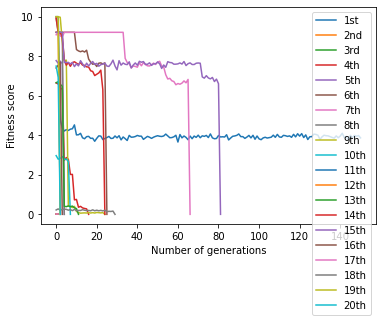

In [5]:

#For plotting No of generation Vs fitness score 

plt.plot(run_evolution(1, 0), label="1st")
plt.plot(run_evolution(1, 15), label="2nd")
plt.plot(run_evolution(1, 30), label="3rd")
plt.plot(run_evolution(1, 40), label="4th")
plt.plot(run_evolution(1, 50), label="5th")
plt.plot(run_evolution(1, 60), label="6th")
plt.plot(run_evolution(1, 70), label="7th")
plt.plot(run_evolution(1, 75), label="8th")
plt.plot(run_evolution(1, 80), label="9th")
plt.plot(run_evolution(1, 90), label="10th")
plt.plot(run_evolution(1, 100), label="11th")
plt.plot(run_evolution(1, 105), label="12th")
plt.plot(run_evolution(1, 110), label="13th")
plt.plot(run_evolution(1, 115), label="14th")
plt.plot(run_evolution(1, 120), label="15th")
plt.plot(run_evolution(1, 125), label="16th")
plt.plot(run_evolution(1, 130), label="17th")
plt.plot(run_evolution(1, 135), label="18th")
plt.plot(run_evolution(1, 140), label="19th")
plt.plot(run_evolution(1, 150), label="20th")



'''plt.plot(run_evolution(1, 0), label="1st")
plt.plot(run_evolution(1, 20), label="2nd")
plt.plot(run_evolution(1, 35), label="3rd")
plt.plot(run_evolution(1, 50), label="4th")
plt.plot(run_evolution(1, 70), label="5th")
plt.plot(run_evolution(1, 90), label="6th")
plt.plot(run_evolution(1, 105), label="7th")
plt.plot(run_evolution(1, 120), label="8th")
plt.plot(run_evolution(1, 135), label="9th")
plt.plot(run_evolution(1, 150), label="10th")'''




plt.xlabel("Number of generations")
plt.ylabel("Fitness score")
# plt.title("Circuit fitness over generations")
plt.legend()
#plt.savefig('20diff_gates_30%mutation.pdf')
plt.show()
